Laplace Demo
------------

This demo introduces basic usage of dune-fempy, using the poisson equation as an example. Namely,

\begin{gather}
- \Delta u + u = f \quad \text{in } \Omega \\
\nabla u \cdot \textbf{n} = 0 \quad \text{on } \Gamma
\end{gather}


If you have compiled DUNE against MPI, we strongly advise you to first initialize MPI from Python.
At least OpenMPI is known to fail, if initialized only in the dune-fempy library.

In [1]:
from mpi4py import MPI

First, we create our computational grid. Our domain will be the unit square divided into 16x16 quadrilaterals. To actually create the grid, we choose an implementation of the DUNE grid interface: a 2-dimensional ALUGrid with simplices and conforming bisection refinement.

In [2]:
from dune.fem import cartesianDomain, leafGrid
domain = cartesianDomain([0, 0], [1, 1], [16, 16])
grid = leafGrid(domain, "ALUSimplexGrid", dimgrid=2, refinement="conforming")

We set up the base variables u, v and x in UFL.

In [3]:
from dune.ufl import Space
from ufl import TestFunction, TrialFunction, SpatialCoordinate
uflSpace = Space((grid.dimGrid, grid.dimWorld), 1)
u = TrialFunction(uflSpace)
v = TestFunction(uflSpace)
x = SpatialCoordinate(uflSpace.cell())

Next we define the equation for the weak form, given by

\begin{equation}
\int_{\Omega} uv + \nabla u\cdot\nabla v \ dx =  \int_{\Omega} f v \ dx.
\end{equation}

Here, we also take $f = \cos(2\pi x_0)\cos(2\pi x_1)$

In [4]:
from math import pi
from ufl import cos, as_vector, dx, grad, inner
f = cos(2*pi*x[0])*cos(2*pi*x[1])
exact = as_vector( [cos(2.*pi*x[0])*cos(2.*pi*x[1])] )
equation = (inner(grad(u), grad(v)) + inner(u,v)) * dx == f * v[0] * dx

We create the space, the mode, and the scheme.

In [7]:
from dune.fem import create
from dune.models.elliptic import importModel
spc = create.space("Lagrange", grid, dimrange=1, polorder=2)
model = create.ellipticModel(grid, equation, exact=exact)()
scheme = create.scheme("FemScheme", spc, model, "scheme")

Importing module for model with signature 519b187057162586cddbaedd3027d4b130a376ed03b9a6d39d78a3166598c6865f6f17f3d3b460859ca62ec5b54bb51c5e9b8af969b1326de50ca91ae6aa7eec
{}


We solve the system and store it in `solution`

In [8]:
solution = scheme.solve()

Next we set up the graphical output using matplotlib.

In [9]:
get_ipython().magic('matplotlib inline')
from matplotlib import pyplot
triangulation = grid.triangulation()
data = solution.pointData()

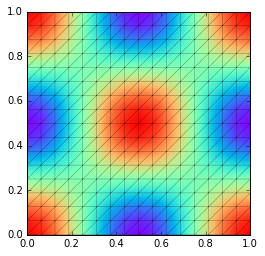

In [11]:
from numpy import amin, amax, linspace
levels = linspace(amin(data[:,0]), amax(data[:,0]), 256)
pyplot.gca().set_aspect('equal')
pyplot.triplot(triangulation, antialiased=True, linewidth=0.2, color='black')
pyplot.tricontourf(triangulation, data[:,0], cmap=pyplot.cm.rainbow, levels=levels)
pyplot.show()

Congratulations! You have successfully solved and visualized your first PDE using dune-fempy.